In [1]:
import pandas as pd
import contractions
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bosst\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bosst\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv(r"C:\Users\bosst\Data Science Job Market Research\data\job_postings.csv")

In [3]:
data.head()

,job_title,date,company_name,address,city,province,remote,hybrid,pay,job_description,benefits,job_type
0,Machine Learning Engineer,2023-12-09,Blurb.fm,NaN,NaN,NaN,True,False,66613.42 - 144330.8,ML ENGINEER\nAre you a machine learning expert...,NaN,Fixed term contract
1,"Ingénieur de données et visualisation, Science...",2023-12-09,Pratt & Whitney,NaN,Longueuil,QC,False,False,66613.42 - 144330.8,Date Posted:\n2023-11-14\nCountry:\nCanada\nLo...,"['Company pension', 'Flexible schedule']",Full-time
2,"Data Analyst, Merchandise Planning",2023-12-09,SSENSE,NaN,Montréal,QC,False,False,66613.42 - 144330.8,"Company Description\n\nSSENSE, pronounced [es-...","['Company pension', 'Flexible schedule']",Fixed term contract
3,Data Science / Machine learning specialist - F...,2023-12-09,CIUSSS de l'Ouest-de-l’Île-de-Montréal,NaN,Verdun,QC,False,False,66613.42 - 144330.8,Reason for Post :\nReplacement more than de 6 ...,"['Company pension', 'Flexible schedule']",Full-time
4,Spécialiste en science des données / apprentis...,2023-12-09,CIUSSS de l'Ouest-de-l’Île-de-Montréal,NaN,Verdun,QC,False,False,66613.42 - 144330.8,Raison d'être de l'affichage :\nRemplacement d...,"['Company pension', 'Flexible schedule']","Temporary,Full-time"


In [4]:
data.shape

(634, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        634 non-null    object
 1   date             634 non-null    object
 2   company_name     634 non-null    object
 3   address          58 non-null     object
 4   city             551 non-null    object
 5   province         550 non-null    object
 6   remote           634 non-null    bool  
 7   hybrid           356 non-null    object
 8   pay              555 non-null    object
 9   job_description  634 non-null    object
 10  benefits         316 non-null    object
 11  job_type         351 non-null    object
dtypes: bool(1), object(11)
memory usage: 55.2+ KB


In [6]:
data.describe()

,job_title,date,company_name,address,city,province,remote,hybrid,pay,job_description,benefits,job_type
count,634,634,634,58,551,550,634,356,555,634,316,351
unique,469,42,417,49,63,8,2,2,261,576,77,16
top,Data Scientist,2023-11-09,TikTok,123 Main St E,Toronto,ON,False,False,66784.0 - 73045.0,Untether AI is building the world’s highest pe...,['Flexible schedule'],Full-time
freq,35,236,11,3,171,271,475,298,16,2,25,237


## Check for unique, duplicate, null data

In [7]:
data.nunique()

job_title          469
date                42
company_name       417
address             49
city                63
province             8
remote               2
hybrid               2
pay                261
job_description    576
benefits            77
job_type            16
dtype: int64

In [8]:
data.isnull().sum() 

job_title            0
date                 0
company_name         0
address            576
city                83
province            84
remote               0
hybrid             278
pay                 79
job_description      0
benefits           318
job_type           283
dtype: int64

## EDA Analysis

### Job Titles

In [9]:
# check most popular job titles
# transform job titles to lower case
data['job_title'].str.lower().value_counts()[:10]

job_title
data scientist                             46
machine learning engineer                  21
senior data scientist                      18
data analyst                                8
senior machine learning engineer            8
senior data analyst                         5
data analyst - informatics and systems      4
sr. data analyst                            4
artificial intelligence (ai) programmer     3
statistician                                3
Name: count, dtype: int64

<Axes: xlabel='job_title', ylabel='Count'>

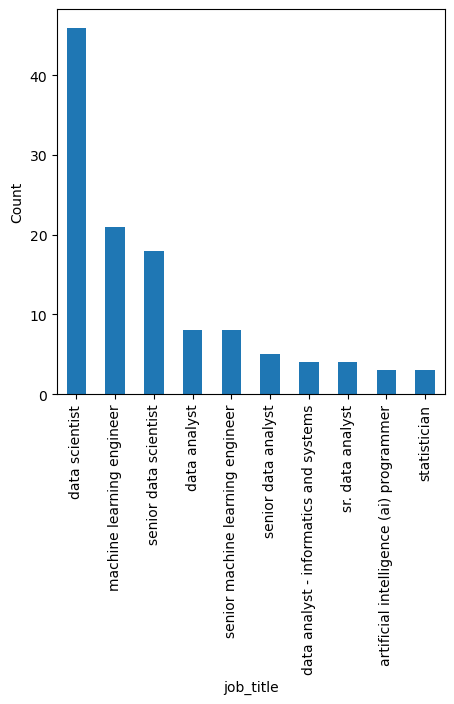

In [10]:
plt.figure(figsize=(5,5))
plt.xlabel("Job Title")
plt.ylabel("Count")
data['job_title'].str.lower().value_counts()[:10].plot(kind = 'bar')

In [11]:
# check least popular job titles
data['job_title'].str.lower().value_counts()[-10:]

job_title
digital reporting and analytics coordinator                1
ai student                                                 1
cloud solution architect - artificial intelligence (ai)    1
digital solution area specialist – data and ai             1
senior deep learning engineer                              1
machine learning engineering manager                       1
jr programmer artificial intelligence                      1
data analytics specialist                                  1
sr data analyst                                            1
senior machine learning engineer (remote)                  1
Name: count, dtype: int64

In [12]:
# check longest and shortest length of name
data['job_title'].apply(len).sort_values(ascending=False)

4      153
1      133
39     132
605    119
513    114
      ... 
405     12
503     12
367     12
234     10
273      9
Name: job_title, Length: 634, dtype: int64

In [13]:
# check what the longest and shortest job titles look like
print(data['job_title'][273],'\n',data['job_title'][4])

BI Intern 
 Spécialiste en science des données / apprentissage automatique - Temps complet - Centre de Recherche de l’Institut Universitaire en Santé Mentale Douglas


### Employer

<Axes: xlabel='company_name', ylabel='Count'>

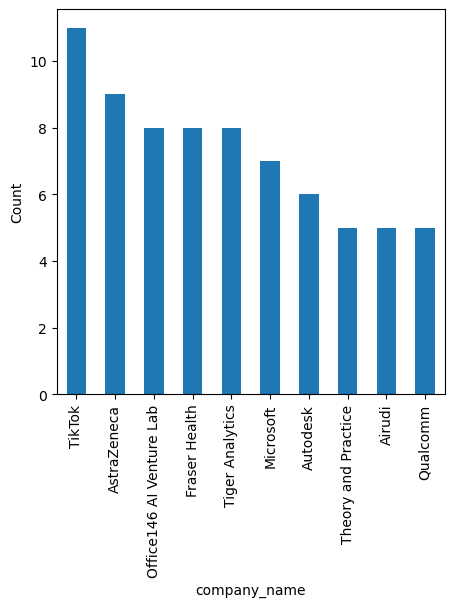

In [14]:
# 10 most popular employer
plt.figure(figsize=(5,5))
plt.xlabel("Company")
plt.ylabel("Count")
data['company_name'].value_counts()[:10].plot(kind = 'bar')

### City

<Axes: xlabel='city', ylabel='Count'>

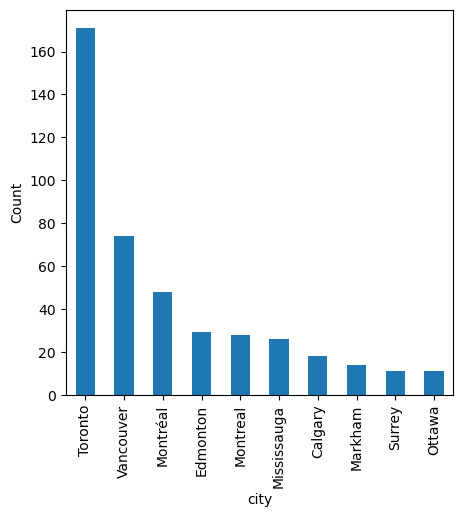

In [15]:
# 10 most popular city
plt.figure(figsize=(5,5))
plt.xlabel("City")
plt.ylabel("Count")
data['city'].value_counts()[:10].plot(kind = 'bar')

<Axes: xlabel='city', ylabel='Count'>

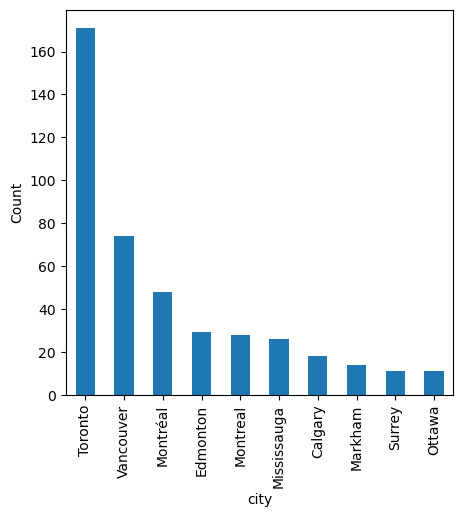

In [16]:
# 10 most popular city
plt.figure(figsize=(5,5))
plt.xlabel("City")
plt.ylabel("Count")
data['city'].value_counts()[:10].plot(kind = 'bar')

### Province

<Axes: xlabel='province', ylabel='Count'>

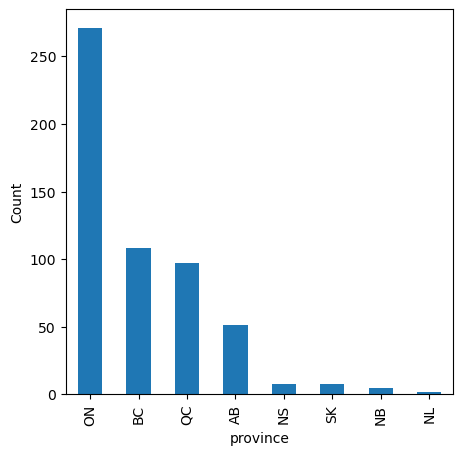

In [17]:
# number of job by provinces
plt.figure(figsize=(5,5))
plt.xlabel("Province")
plt.ylabel("Count")
data['province'].value_counts()[:10].plot(kind = 'bar')

### Remote 

<Axes: xlabel='remote', ylabel='Count'>

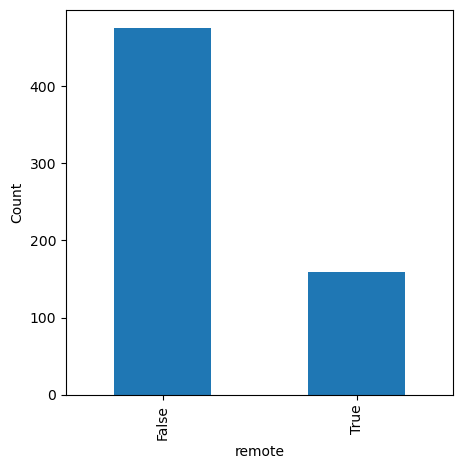

In [18]:
# number of job by provinces
plt.figure(figsize=(5,5))
plt.xlabel("Remote")
plt.ylabel("Count")
data['remote'].value_counts()[:10].plot(kind = 'bar')

### Pay

In [19]:
# only access row with pay
data_dup = data[~pd.isna(data['pay'])]
data_dup.reset_index(inplace=True, drop=True)

In [20]:
from statistics import mean 

In [21]:
# get average pay for all row
data_dup['pay'] = data_dup['pay'].str.split(" - ").apply(lambda x: [float(number) for number in x]).apply(mean)

C:\Users\bosst\AppData\Local\Temp\ipykernel_26068\3721199999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup['pay'] = data_dup['pay'].str.split(" - ").apply(lambda x: [float(number) for number in x]).apply(mean)


<Axes: xlabel='job_title'>

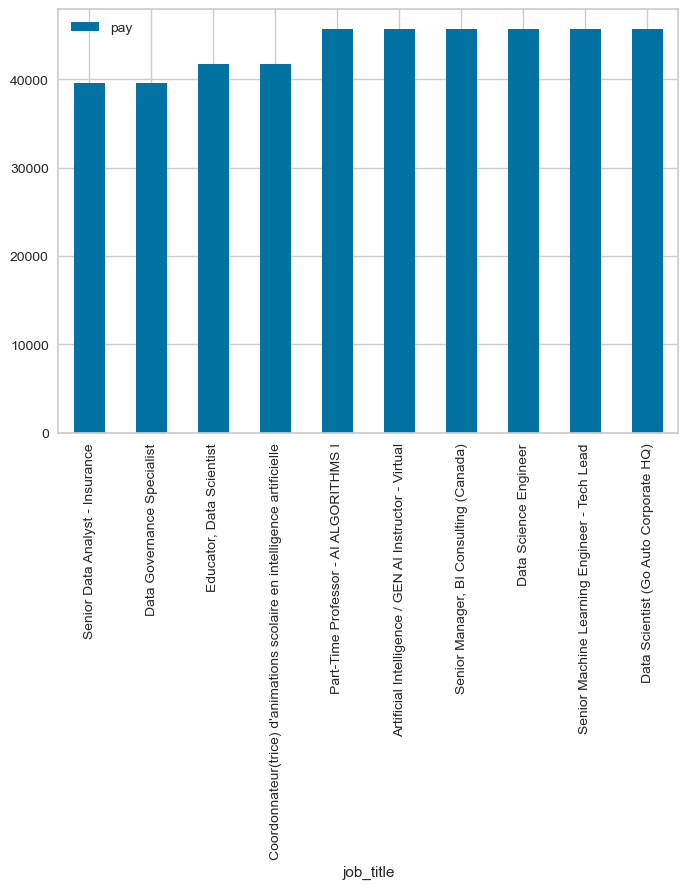

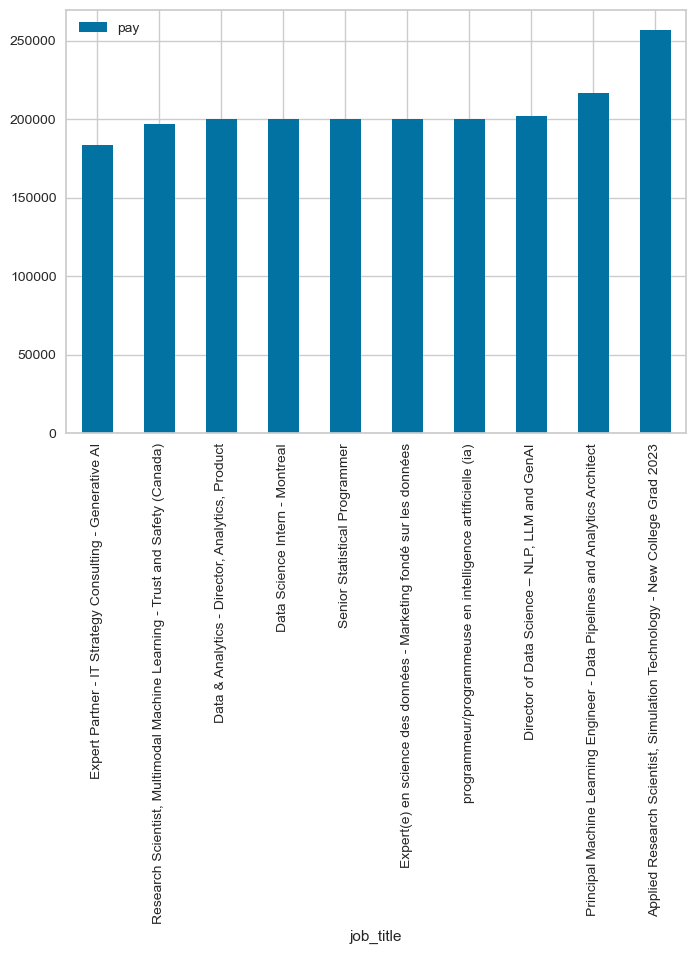

In [44]:
# see job with highest and lowest mean salary
gb_obj = data_dup[['job_title','pay']].groupby(by = ['job_title']).mean().sort_values(by = ['pay'])
gb_obj[:10].plot(kind = 'bar')
gb_obj[-10:].plot(kind = 'bar')

### Job Description

In [23]:
desc = data['job_description'][1]

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bosst\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bosst\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bosst\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
# clean description dataframe and tokenize each description with POS tag
def clean_desc(desc):
    # clean noise from job description, only keep word, number, space 
    desc = re.sub(r'[^.,\w\d\s\' ]+', ' ', desc).lower()
    # tokenize words using ntlk tokenizer
    desc = nltk.word_tokenize(desc)
    # perform text contractions for each word then join them together 
    desc = [contractions.fix(word) for word in desc]
    # lemmatize words
    desc = [WordNetLemmatizer().lemmatize(word) for word in desc]
    # clean stop words
    stop_words = set(stopwords.words('english'))
    desc = [word for word in desc if not word in stop_words]
    return nltk.pos_tag(desc)

In [26]:
# see length of job description
data['job_description_length'] = data['job_description'].apply(clean_desc).apply(len)

In [27]:
data['job_description_length'].sort_values()

400      49
359      58
487      62
593      68
572      82
       ... 
370    1801
564    2131
558    2185
155    2821
356    2884
Name: job_description_length, Length: 634, dtype: int64

In [28]:
print(data['job_description'][400])

Data Scientist
Montreal, QC Hybrid
Long Term Contract
5+ years
Job Description:
Python skill on DB handling, Data Clean up, conversant in Pandas. Accustomed with Python based charts and plots. Good SQL knowledge, with basic knowledge of MSSQL. Experience in Flask API Good to have (not must)
- Basic Web UI skill (Angular / React)


In [29]:
print(data['job_description'][155])

Location: Montreal, Canada
Dans des marchés en rapide évolution, les clients à travers le monde font confiance à Thales. Thales est une entreprise où les personnes les plus brillantes du monde entier se regroupent pour mettre en commun leurs idées et ainsi s'inspirer mutuellement. Dans tous les secteurs où œuvre Thales, notamment l’aérospatiale, le transport, la défense, la sécurité et l'espace, nos équipes d’architectes conçoivent des solutions innovantes qui rendent demain possible dès aujourd’hui.
Carrefour mondial de l’intelligence artificielle, Montréal est le foyer du nouveau centre de recherche et de technologie spécialisé en intelligence artificielle (cortAIx) collaborant avec les principaux groupes canadiens de recherche en intelligence artificielle à Montréal et à Toronto. S’appuyant sur ses compétences dans les principaux marchés industriels, Thales donne vie à l'intelligence artificielle au profit de ses clients tout en créant de passionnants emplois pour les chercheurs et 

In [30]:
from yellowbrick.text import PosTagVisualizer

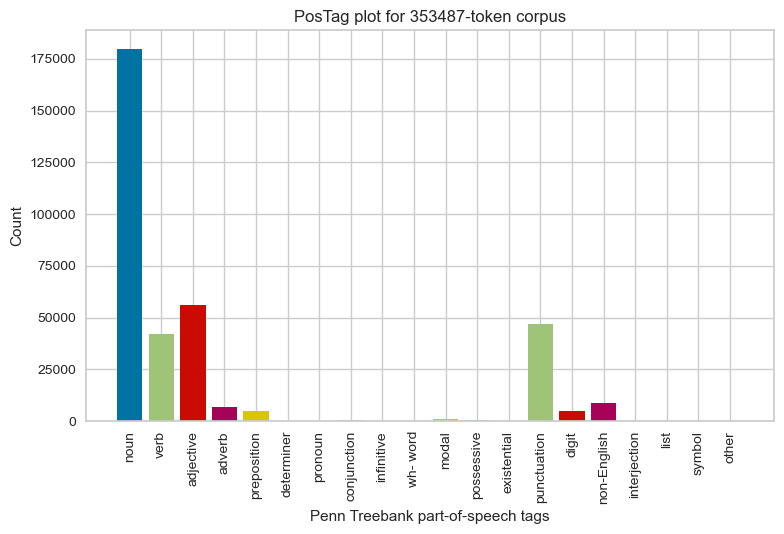

<Axes: title={'center': 'PosTag plot for 353487-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [31]:
# create plot to see the POS tag count
tagged_stanzas = []
for index in data['job_description'].index:
    desc = data['job_description'][index]
    desc = clean_desc(desc)
    tagged_stanzas.append([desc])
viz = PosTagVisualizer()
viz.fit(tagged_stanzas)
viz.show()

#### N-Gram

In [32]:
from nltk import ngrams

In [33]:
# clean description dataframe and return list of trigrams
def trigram(desc):
    # clean noise from job description, only keep word, number, space 
    desc = re.sub(r'[!@#$%^*/()-=+\';,]', ' ', desc).lower()
    # tokenize words using ntlk tokenizer
    desc = nltk.word_tokenize(desc)
    # perform text contractions for each word then join them together 
    desc = [contractions.fix(word) for word in desc]
    # lemmatize words
    desc = [WordNetLemmatizer().lemmatize(word) for word in desc]
    # clean stop words
    stop_words = set(stopwords.words('english'))
    desc = [word for word in desc if not word in stop_words]
    trigrams_zip = ngrams(desc, 3)
    trigrams = []
    for trigram in trigrams_zip:
        trigrams.append(' '.join(trigram))
    return trigrams

In [34]:
# clean description dataframe and return list of trigrams
def bigram(desc):
    # clean noise from job description, only keep word, number, space 
    desc = re.sub(r'[!@#$%^*()/-=+\';,]', ' ', desc).lower()
    # tokenize words using ntlk tokenizer
    desc = nltk.word_tokenize(desc)
    # perform text contractions for each word then join them together 
    desc = [contractions.fix(word) for word in desc]
    # lemmatize words
    desc = [WordNetLemmatizer().lemmatize(word) for word in desc]
    # clean stop words
    stop_words = set(stopwords.words('english'))
    desc = [word for word in desc if not word in stop_words]
    bigrams_zip = ngrams(desc, 2)
    bigrams = []
    for bigram in bigrams_zip:
        bigrams.append(' '.join(bigram))
    return bigrams

In [35]:
# clean description dataframe and return list of trigrams
def unigram(desc):
    # clean noise from job description, only keep word, number, space 
    desc = re.sub(r'[!@#$%^*()-/=+\';,]', ' ', desc).lower()
    # tokenize words using ntlk tokenizer
    desc = nltk.word_tokenize(desc)
    # perform text contractions for each word then join them together 
    desc = [contractions.fix(word) for word in desc]
    # lemmatize words
    desc = [WordNetLemmatizer().lemmatize(word) for word in desc]
    # clean stop words
    stop_words = set(stopwords.words('english'))
    desc = [word for word in desc if not word in stop_words]
    unigrams_zip = ngrams(desc, 1)
    unigrams = []
    for unigram in unigrams_zip:
        unigrams.append(' '.join(unigram))
    return unigrams

In [36]:
desc = data['job_description'][0]

In [37]:
data['job_description_trigrams'] = data['job_description'].apply(trigram)
data['job_description_bigrams'] = data['job_description'].apply(bigram)
data['job_description_unigrams'] = data['job_description'].apply(unigram)

In [38]:
trigrams_list = []
for index in data['job_description_trigrams'].index:
    for trigram in data['job_description_trigrams'][index]:
        trigrams_list.append(trigram)
bigrams_list = []
for index in data['job_description_bigrams'].index:
    for bigram in data['job_description_bigrams'][index]:
        bigrams_list.append(bigram)
unigrams_list = []
for index in data['job_description_unigrams'].index:
    for unigram in data['job_description_unigrams'][index]:
        unigrams_list.append(unigram)

In [39]:
trigrams_df = pd.DataFrame(trigrams_list, columns = ['trigram'])
bigrams_df = pd.DataFrame(bigrams_list, columns = ['bigram'])
unigrams_df = pd.DataFrame(unigrams_list, columns = ['unigram'])

<Axes: ylabel='trigram'>

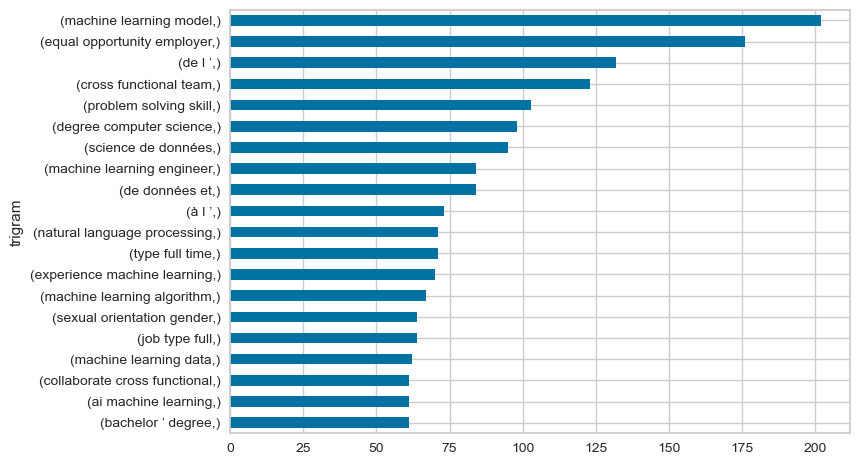

In [50]:
trigrams_df.value_counts(ascending=True)[-20:].plot(kind = 'barh')

<Axes: ylabel='unigram'>

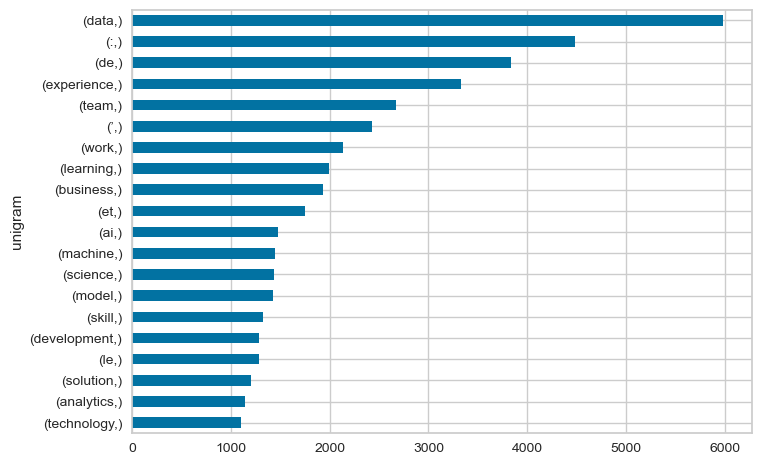

In [49]:
unigrams_df.value_counts(ascending=True)[-20:].plot(kind = 'barh')

<Axes: ylabel='bigram'>

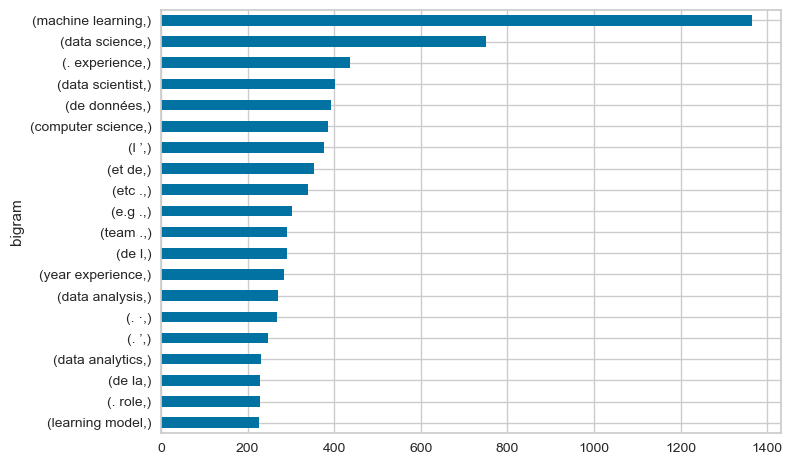

In [51]:
bigrams_df.value_counts(ascending=True)[-20:].plot(kind = 'barh')